___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [91]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [10]:
BAC = pdr.get_data_tiingo('BAC', api_key='45adf2110acb63a2308f58b9dfb4a1961f1483bb',start = datetime.datetime(2006,1,1), end = datetime.datetime(2016,1,1))

C = pdr.get_data_tiingo('C', api_key = '45adf2110acb63a2308f58b9dfb4a1961f1483bb', start = datetime.datetime(2006, 1, 1), end = datetime.datetime(2016,1,1))

GS = pdr.get_data_tiingo('GS', api_key = '45adf2110acb63a2308f58b9dfb4a1961f1483bb', start = datetime.datetime(2006, 1, 1), end = datetime.datetime(2016,1,1))

JPM = pdr.get_data_tiingo('JPM', api_key = '45adf2110acb63a2308f58b9dfb4a1961f1483bb', start = datetime.datetime(2006, 1, 1), end = datetime.datetime(2016,1,1))

MS = pdr.get_data_tiingo('MS', api_key = '45adf2110acb63a2308f58b9dfb4a1961f1483bb', start = datetime.datetime(2006, 1, 1), end = datetime.datetime(2016,1,1))

WFC = pdr.get_data_tiingo('WFC', api_key = '45adf2110acb63a2308f58b9dfb4a1961f1483bb', start = datetime.datetime(2006, 1, 1), end = datetime.datetime(2016,1,1))

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [11]:
tickers = ['BAC','C', 'GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [12]:
BAC = BAC.reset_index().drop(['symbol', 'adjClose','adjOpen', 'adjHigh','adjLow', 'adjVolume', 'divCash', 'splitFactor'],axis=1)
BAC['date'] = BAC['date'].apply(lambda x: x.to_datetime64())
BAC = BAC.set_index('date')
C = C.reset_index().drop(['symbol', 'adjClose','adjOpen', 'adjHigh','adjLow', 'adjVolume', 'divCash', 'splitFactor'],axis=1)
C['date'] = C['date'].apply(lambda x: x.to_datetime64())
C = C.set_index('date')
GS = GS.reset_index().drop(['symbol', 'adjClose','adjOpen', 'adjHigh','adjLow', 'adjVolume', 'divCash', 'splitFactor'],axis=1)
GS['date'] = GS['date'].apply(lambda x: x.to_datetime64())
GS = GS.set_index('date')
JPM = JPM.reset_index().drop(['symbol', 'adjClose','adjOpen', 'adjHigh','adjLow', 'adjVolume', 'divCash', 'splitFactor'],axis=1)
JPM['date'] = JPM['date'].apply(lambda x: x.to_datetime64())
JPM = JPM.set_index('date')
MS = MS.reset_index().drop(['symbol', 'adjClose','adjOpen', 'adjHigh','adjLow', 'adjVolume', 'divCash', 'splitFactor'],axis=1)
MS['date'] = MS['date'].apply(lambda x: x.to_datetime64())
MS = MS.set_index('date')
WFC = WFC.reset_index().drop(['symbol', 'adjClose','adjOpen', 'adjHigh','adjLow', 'adjVolume', 'divCash', 'splitFactor'],axis=1)
WFC['date'] = WFC['date'].apply(lambda x: x.to_datetime64())
WFC = WFC.set_index('date')

In [13]:
bank_stocks = pd.concat([BAC,C,GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [15]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info   close   high    low   open    volume  close   high    low   open   
date                                                                            
2006-01-03   47.08  47.18  46.15  46.92  16296700  49.29  49.38  48.11  49.00   
2006-01-04   46.58  47.24  46.45  47.00  17757900  48.38  49.10  48.35  48.86   
2006-01-05   46.64  46.83  46.32  46.58  14970700  48.62  48.78  48.40  48.44   
2006-01-06   46.57  46.91  46.35  46.80  12599800  48.62  48.90  48.20  48.88   
2006-01-09   46.60  46.97  46.36  46.72  15619400  48.39  48.74  48.30  48.60   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...  close   high      low   open   volume  close   
date                   ...                                                 
2006-01-03   15376000  ...  58.31  58.49  56.7400  57.17  5377000  63.80   
2006-01-04   18709000  ...  58.35  59.28  58.3500  58.70  7977800  63.06   
2006-01-05   11431000  ...  58.51  58.59  58.0200  58.55  5778000  62.99   
2006-01-06   13702000  ...  58.57  58.85  58.0500  58.77  6889800  63.36   
2006-01-09   16807000  ...  59.19  59.29  58.6244  58.63  4144500  63.35   

Bank Ticker                                
Stock Info    high    low   open   volume  
date                                       
2006-01-03   63.95  62.39  63.20  5508200  
2006-01-04   63.64  62.73  63.60  5435000  
2006-01-05   63.11  62.62  63.00  5079000  
2006-01-06   63.55  62.77  63.16  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [16]:
bank_stocks.xs('close', level=1,axis=1).max(axis=0)

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [18]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [28]:
returns = bank_stocks.xs('close', level=1,axis=1)
for i in list(returns):
    returns.loc[:,i] = returns[i].pct_change()
    returns = returns.rename(columns={i:'{} Return'.format(i)})

/home/sharabesh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [29]:
returns.head()

Bank Ticker,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

/home/sharabesh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sharabesh/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


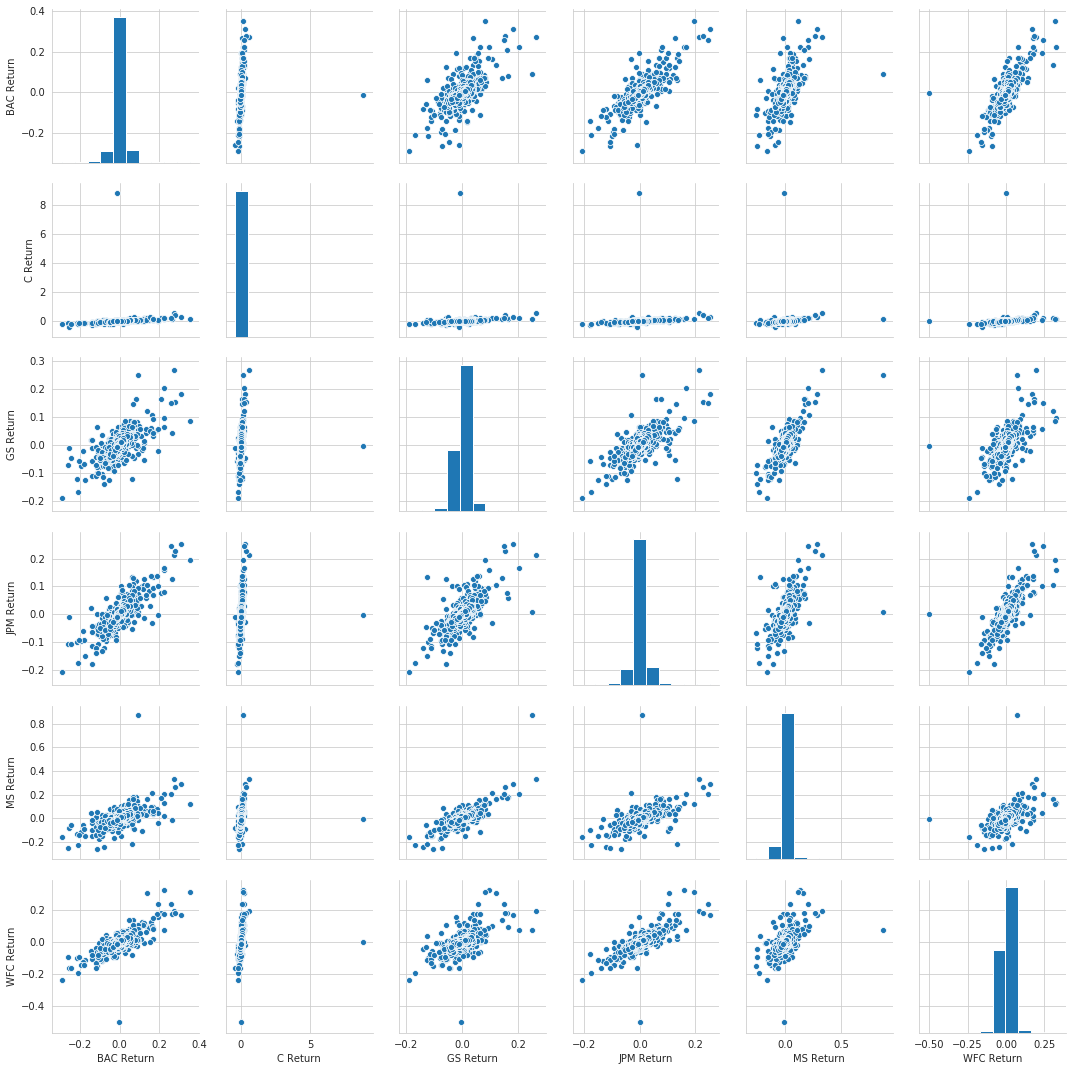

In [92]:
sns.pairplot(returns)

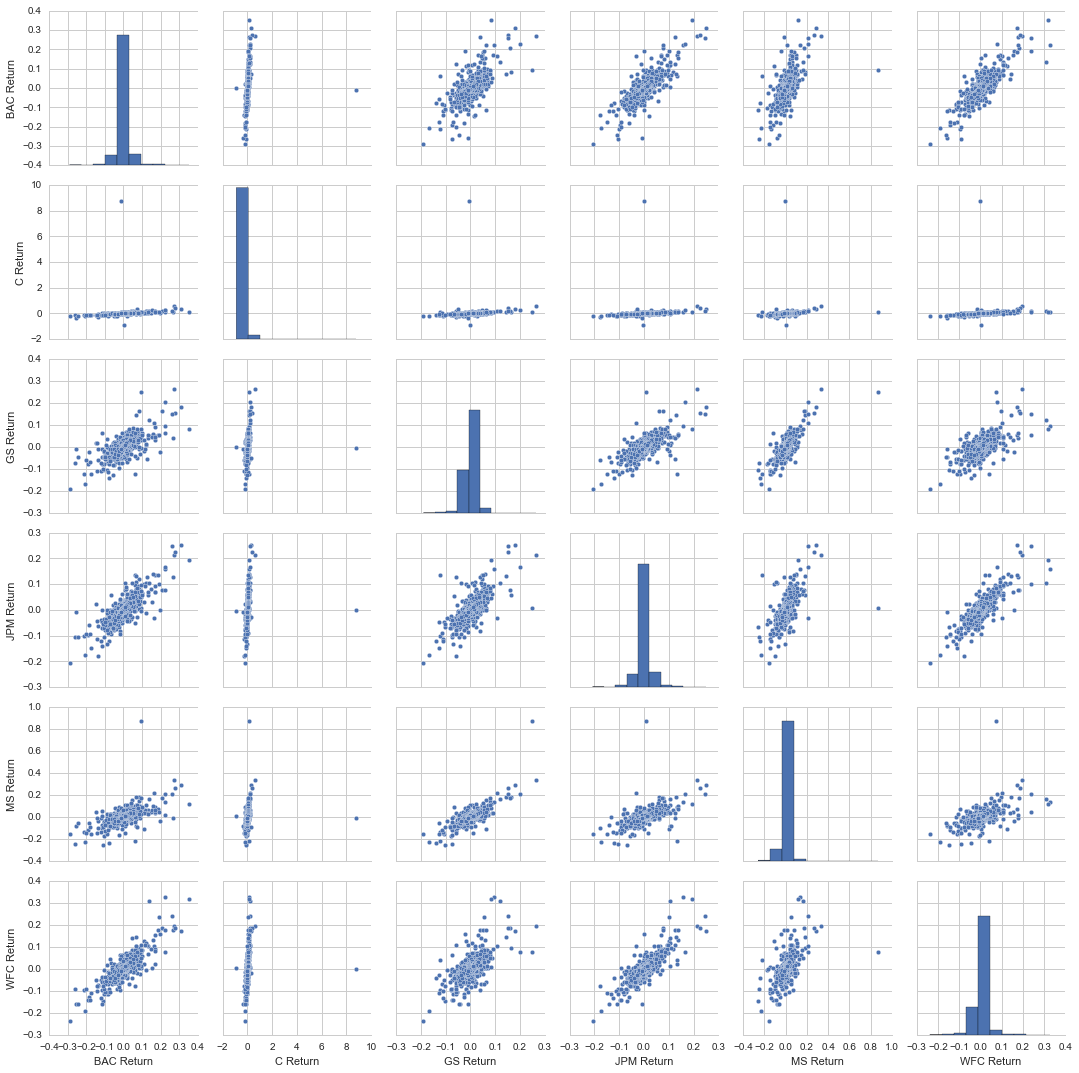

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [54]:
returns.idxmin(axis=0)

Bank Ticker
BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [55]:
returns.idxmax(axis=0)

Bank Ticker
BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [56]:
returns.std()

Bank Ticker
BAC Return    0.036617
C Return      0.179065
GS Return     0.025357
JPM Return    0.027651
MS Return     0.037831
WFC Return    0.031841
dtype: float64

In [64]:
returns_2015 = returns.loc[(returns.index > datetime.datetime(2014,12,31)) & (returns.index < datetime.datetime(2016,1,1))]
returns_2015.std()

Bank Ticker
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

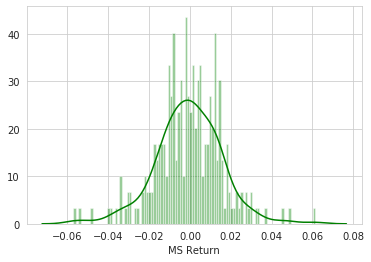

In [94]:
sns.distplot(returns_2015['MS Return'],bins=100,color='green',hist=True)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



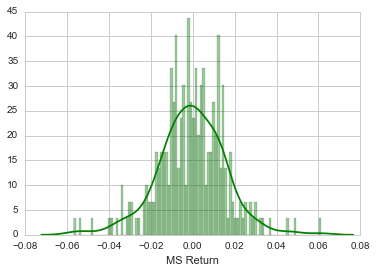

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

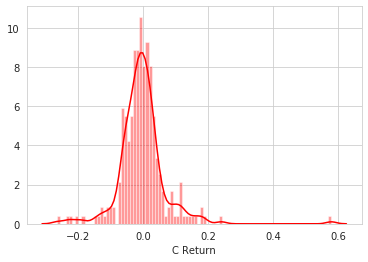

In [98]:
returns_2008 = returns.loc[(returns.index > datetime.datetime(2007,12,31)) & (returns.index < datetime.datetime(2009,1,1))]
sns.distplot(returns_2008['C Return'], color='red', bins=90)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



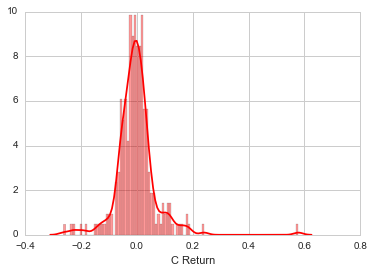

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

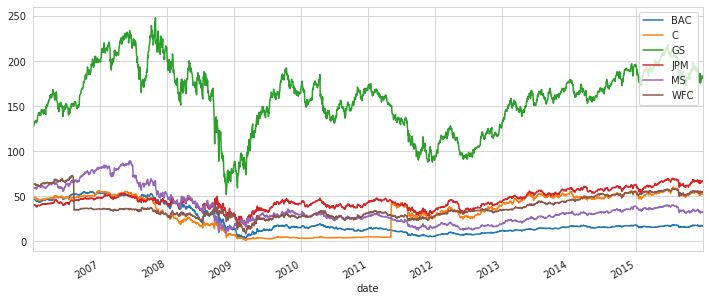

In [109]:
close = bank_stocks.xs('close',axis=1, level=1)
fig,ax = plt.subplots(figsize=(12,5))
close.plot(ax=ax)
ax.legend(loc='upper right')

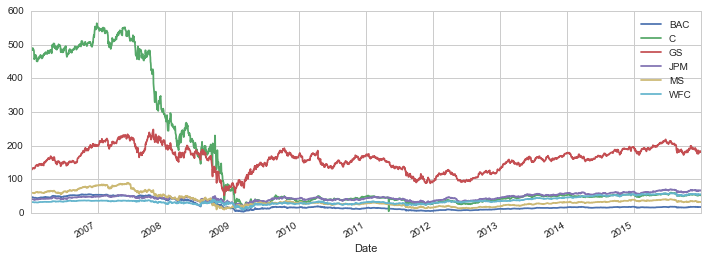

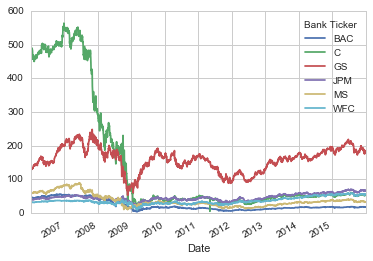

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

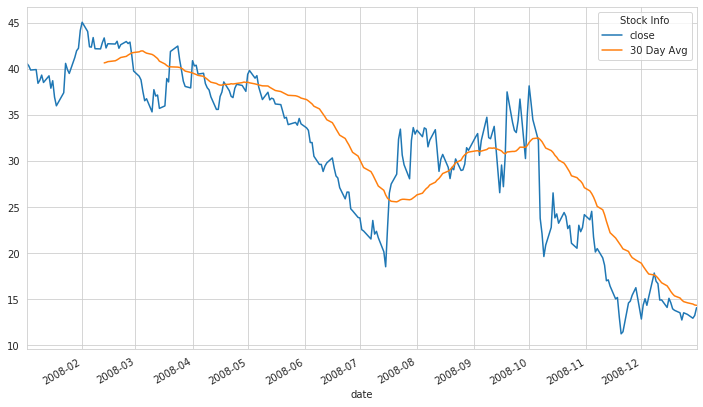

In [135]:
data_BAC = bank_stocks.xs('BAC', axis=1)
data_2008 = data_BAC.loc[(data_BAC.index > datetime.datetime(2007,12,31)) & (data_BAC.index < datetime.datetime(2009,1,1))]
data_2008['30 Day Avg'] = data_2008['close'].rolling(window = 30,center = False).mean()
fig,ax = plt.subplots(figsize=(12,7))
data_2008.drop(['high', 'low', 'open', 'volume'], axis=1).plot(ax=ax)

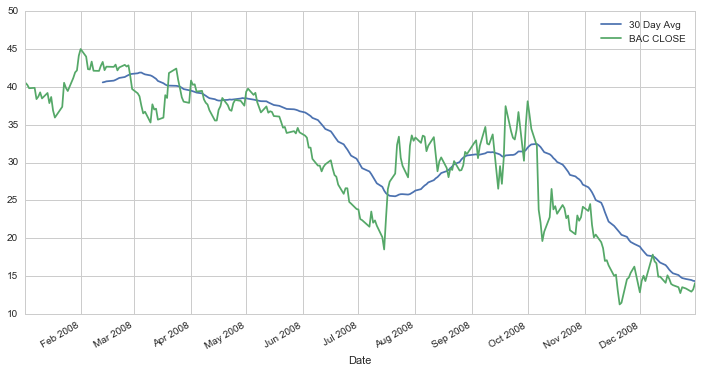

** Create a heatmap of the correlation between the stocks Close Price.**

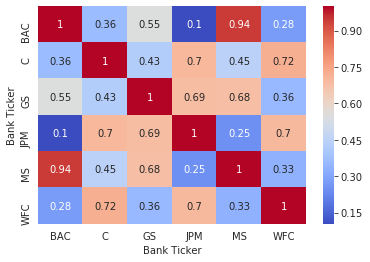

In [150]:
cor = bank_stocks.xs('close',axis=1,level=1).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

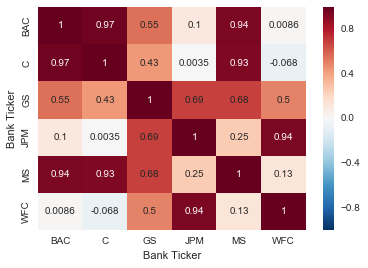

** Optional: Use seaborn's clustermap to cluster the correlations together:**

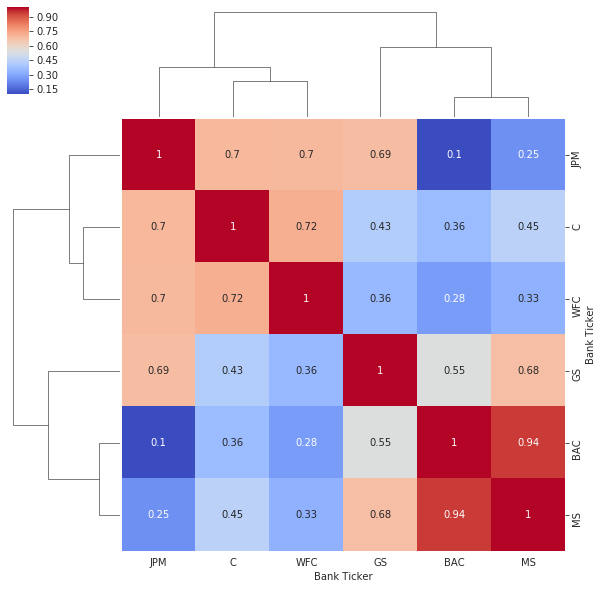

In [149]:
sns.clustermap(cor,cmap='coolwarm',annot=True)

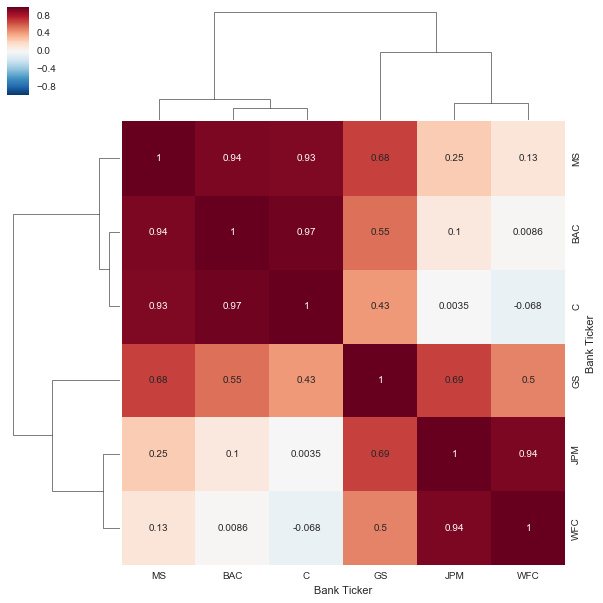

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [154]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot,ta_plot
init_notebook_mode(connected=True)
cf.go_offline()

In [159]:
data_BAC.loc[(data_BAC.index > datetime.datetime(2014,12,31)) & (data_BAC.index < datetime.datetime(2016,1,2))].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [163]:
data_MS = bank_stocks.xs('MS',axis=1)
data_MS.loc[(data_MS.index > datetime.datetime(2014,12,31)) & (data_MS.index < datetime.datetime(2016,1,2))].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [164]:
data_BAC.loc[(data_BAC.index > datetime.datetime(2014,12,31)) & (data_BAC.index < datetime.datetime(2016,1,2))].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.